# Question 1
The independent variable is the color of the word being shown and the dependent variable is the time it takes to name the color.

# Question 2
An appropriate null hypothesis is that there is no difference in time it takes to name the color between the 2 conditions. An alternative hypothesis would be that it takes longer to name the color for the incongruent condition based on the fact that it is likely the name of the color influences the subject's response to the actual color. To test this, a one-tailed t-test would work since we are working with a sample and we expect the sample times to increase with the incongruent condition.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [3]:
file = pd.read_csv('C:\\Users\\tringo\\Udacity\\Data Analyst Nanodegree\\P1\\stroopdata.csv')

In [4]:
type(file)

pandas.core.frame.DataFrame

In [5]:
file.size

48

In [45]:
file

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


# Question 3
Mean of congruent: 14.05  
Mean of incongruent: 22.02  
Std Dev of congruent: 3.56  
Std Dev of incongruent: 4.80

These and additional statistics are provided in the table below.

In [6]:
file.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


# Question 4

Several figures below visually describe the distribution of the dataset. We can see from the histograms that neither set has a markedly normal distribution. One of the assumptions for a paired t-test is that the distributions should be normally distributed but we'll relax that assumption for this case. Also, we can see that the Incongruent samples are overall higher in value and this is even more clear in the figure with both histograms plotted together. Boxplots are also provided for another view of the dataset. Here we see that the Incongruent set has 2 outliers as indicated by the individual points (+) well outside the reach of the upper whisker. In a more detailed study, we may want to consider removing them but for now we'll keep them in the analysis.

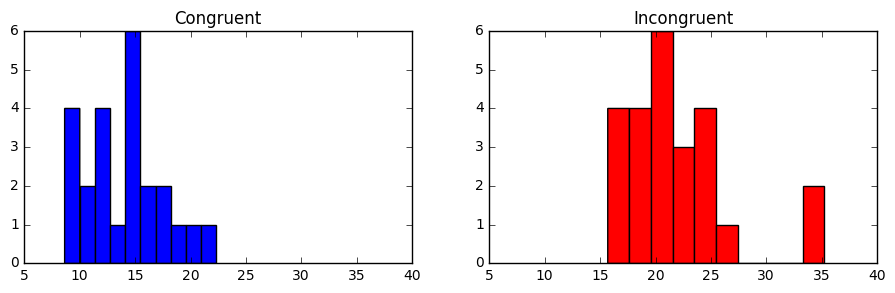

In [98]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11,3))

ax0, ax1 = axes.flatten()
ax0.hist(file.Congruent)
ax1.hist(file.Incongruent, color = 'r')
ax0.set_title('Congruent')
ax1.set_title('Incongruent')
ax0.set_xlim(5,40)
ax1.set_xlim(5,40)
plt.show()

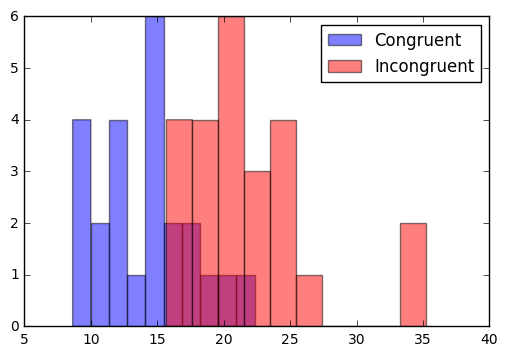

In [51]:
plt.hist(file.Congruent, alpha=0.5, color ='b', label='Congruent')
plt.hist(file.Incongruent, alpha=0.5, color = 'r', label ='Incongruent')
plt.legend(loc='upper right')
plt.show()

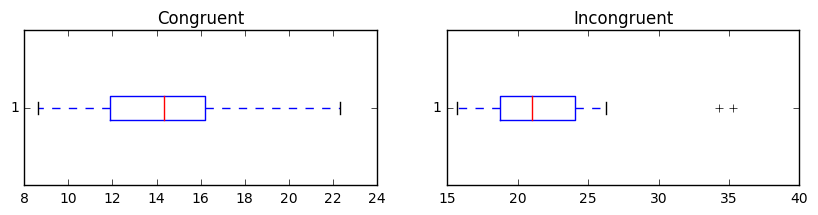

In [100]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,2))
ax0, ax1 = axes.flatten()
ax0.boxplot(file.Congruent, vert=False, whis=1.5)
ax1.boxplot(file.Incongruent, vert=False, whis=1.5)
ax0.set_title('Congruent')
ax1.set_title('Incongruent')
plt.show()

In [54]:
file['Difference'] = file['Incongruent'] - file['Congruent']

In [55]:
file

,Congruent,Incongruent,Difference
0,12.079,19.278,7.199
1,16.791,18.741,1.950
2,9.564,21.214,11.650
3,8.630,15.687,7.057
4,14.669,22.803,8.134
5,12.238,20.878,8.640
6,14.692,24.572,9.880
7,8.987,17.394,8.407
8,9.401,20.762,11.361
9,14.480,26.282,11.802


In [56]:
file.describe()

,Congruent,Incongruent,Difference
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,1.950000
25%,11.895250,18.716750,3.645500
50%,14.356500,21.017500,7.666500
75%,16.200750,24.051500,10.258500
max,22.328000,35.255000,21.919000


# Question 5

The code below shows the calculation of the t-statistic for this dataset with step-by-step results displayed in the table below.

It was performed in the following steps:

1. Calculate the differences for each sample (Incongruent - Congruent)
2. Calculate the mean of the differences
3. Subtract the mean difference from the difference for each sample and square each value
4. Sum the squares
5. Calculate the variance of the differences by dividing the sum of squares by (n-1), where n = sample size
6. Calculate the standard deviation of the differences by taking the square root of the variance
7. Calculate the standard error of the mean difference by dividing the standard deviation by the square root of n
8. Calculate the t-statistic my dividing the mean difference by the standard error of the mean

The resulting t-statistic is 8.02071.

Using a 95% confidence level w/ 23 degrees of freedom, a t-table shows a critical t-value of 1.714 for a one-tailed test.

We see that the t-statistic is much larger than the critical t-value. The resulting p-value is ~2.05E-8 meaning it is very unlikely these results happened by chance and that the results are statistically significant. Based on this, we can reject the null hypothesis. I can conclude that the color of the word factors in to how long it takes to correctly say the color, regardless of what the word actually says. This agrees with my initial expectations. 

In [112]:
import math

file['Difference'].mean()
file['Squares'] =(file['Difference'] - file['Difference'].mean())**2
file['Sum of Squares'] = file['Squares'].sum()
file['Sum of Squares'].iloc[1:] = ' '
file['Variance'] = file['Sum of Squares'].iloc[:1]/int(len(file)-1) 
file['Variance'].iloc[1:]  = ' '
file['Std Dev'] = math.sqrt(file['Variance'].iloc[:1])
file['Std Dev'].iloc[1:] = ' '
file['SE of Mean'] = file['Std Dev'].iloc[:1]/math.sqrt(int(len(file)))
file['SE of Mean'].iloc[1:] = ' '
file['t-stat'] = file['Difference'].mean()/file['SE of Mean'].iloc[:1]
file['t-stat'].iloc[1:] = ' '
file

C:\Users\tringo\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Congruent,Incongruent,Difference,Squares,Sum of Squares,Variance,Std Dev,SE of Mean,t-stat
0,12.079,19.278,7.199,0.586437,544.33,23.6665,4.86483,0.993029,8.02071
1,16.791,18.741,1.950,36.177719,,,,,
2,9.564,21.214,11.650,13.580760,,,,,
3,8.630,15.687,7.057,0.824086,,,,,
4,14.669,22.803,8.134,0.028631,,,,,
5,12.238,20.878,8.640,0.455906,,,,,
6,14.692,24.572,9.880,3.668023,,,,,
7,8.987,17.394,8.407,0.195548,,,,,
8,9.401,20.762,11.361,11.534231,,,,,
9,14.480,26.282,11.802,14.724168,,,,,
